

1. If you are familiar with python then only follow the code. 
2. The simple explanations about any visual or graph will be there.
3. There will be a brief conclusion of the report.
4. Every explanation is presented below the line of code's output.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

IMPORTED USEFUL LIBRARIES

In [2]:
df= pd.read_csv("C:/Users/asus/OneDrive/Desktop/Datasets/supermarket_sales - Sheet1.csv")

READING DATA THROUGH *pd.read_csv* and saving that in *df*

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


We got 1000 rows and 17 features

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Basic info of the data, looking at any *null values, datatypes*

# FEATURE ENGINEERING

In [6]:
df['date'] = pd.to_datetime(df['Date'])
df['date'].dtype
df['date'] = pd.to_datetime(df['date'])
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
del(df["date"])

Using the date column to create more specific columns. such as *day, month, year*

In [7]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2,2019


In [8]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

Creating more specific column utilizing the *Time column*

In [9]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

Looking for "Char" columns

In [10]:
print("A detailed description of the dataset ")
d = df.describe().T
d

A detailed description of the dataset 


,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


In [11]:
print('Insights obtained from the dataset are as follows :')
print("1. Mean ratings of an experience in the supermaket =",d.iloc[-5,1])
print("1. Mean unit price of an article in the supermaket = $",d.iloc[0,1])
print("2. Mean cogs obtained from selling the articles    = $",d.iloc[4,1])
print("3. Mean gross margin percentage of articles sold   = $",d.iloc[5,1])
print("4. So mean revenue in dollars of the supermarket   = $",(d.iloc[4,1]/(d.iloc[5,1]-1))+d.iloc[4,1])
print("5. Net mean income per day of the supermarket      = $",((d.iloc[4,1]/(d.iloc[5,1]-1))+d.iloc[4,1])/40)

Insights obtained from the dataset are as follows :
1. Mean ratings of an experience in the supermaket = 6.9727
1. Mean unit price of an article in the supermaket = $ 55.67213
2. Mean cogs obtained from selling the articles    = $ 307.58738
3. Mean gross margin percentage of articles sold   = $ 4.761904762
4. So mean revenue in dollars of the supermarket   = $ 389.35111392198064
5. Net mean income per day of the supermarket      = $ 9.733777848049517


**Above our some basic insights like mean ratings, mean unit price** *e.t.c*

In [12]:
print("According to customer satisfaction level, the supermarket is ",end=": ")
if(d.iloc[-1,1]>5.0):
    print("Good")
else:
    print("Poor")

According to customer satisfaction level, the supermarket is : Good


# DATA VISUALIZATION

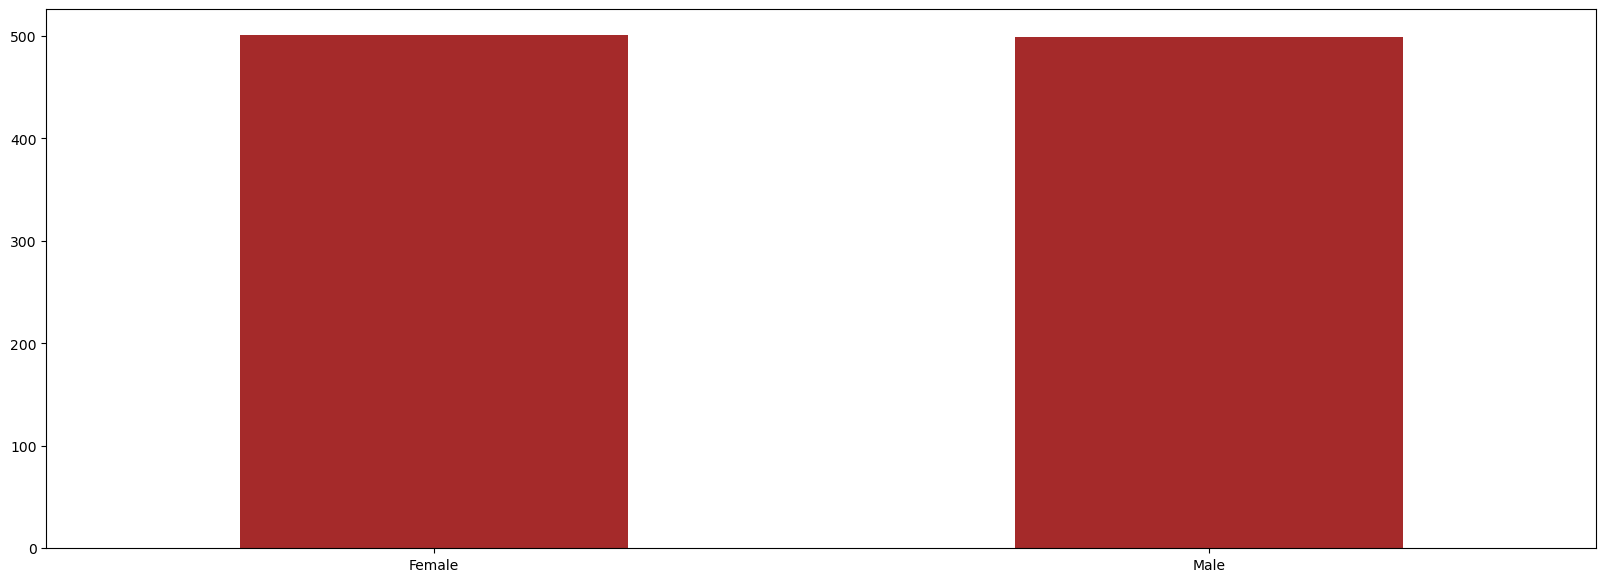

In [13]:
x = df['Gender'].value_counts()
plt.figure(figsize=(20,7))
x.plot(kind = 'bar',color = 'brown')
plt.xticks(rotation = 0);

Male and Female proportion through bar graph

Text(0.5, 1.0, 'Ratings by Branch')

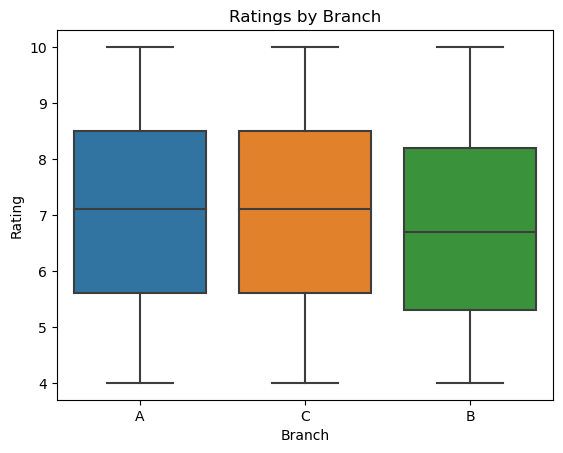

In [14]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch")

Useful Box plots and you can see that average rating is less in **BRANCH B**

<Axes: xlabel='Product line', ylabel='Rating'>

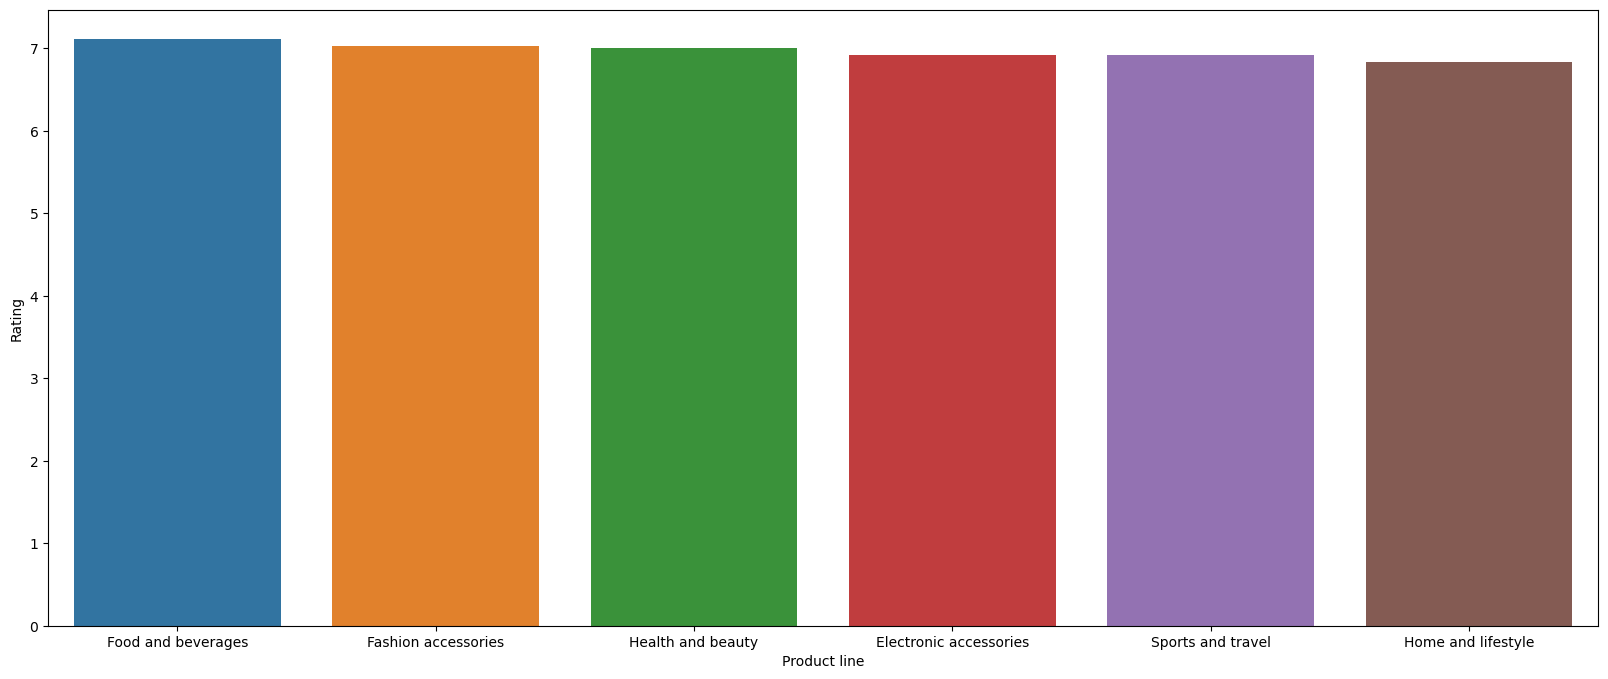

In [15]:
cat=df[["Product line", "Rating"]].groupby(['Product line'], as_index=False).mean().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='Rating', data=cat)

**Negligible variation of rating across product line**

<Axes: xlabel='Product line', ylabel='gross income'>

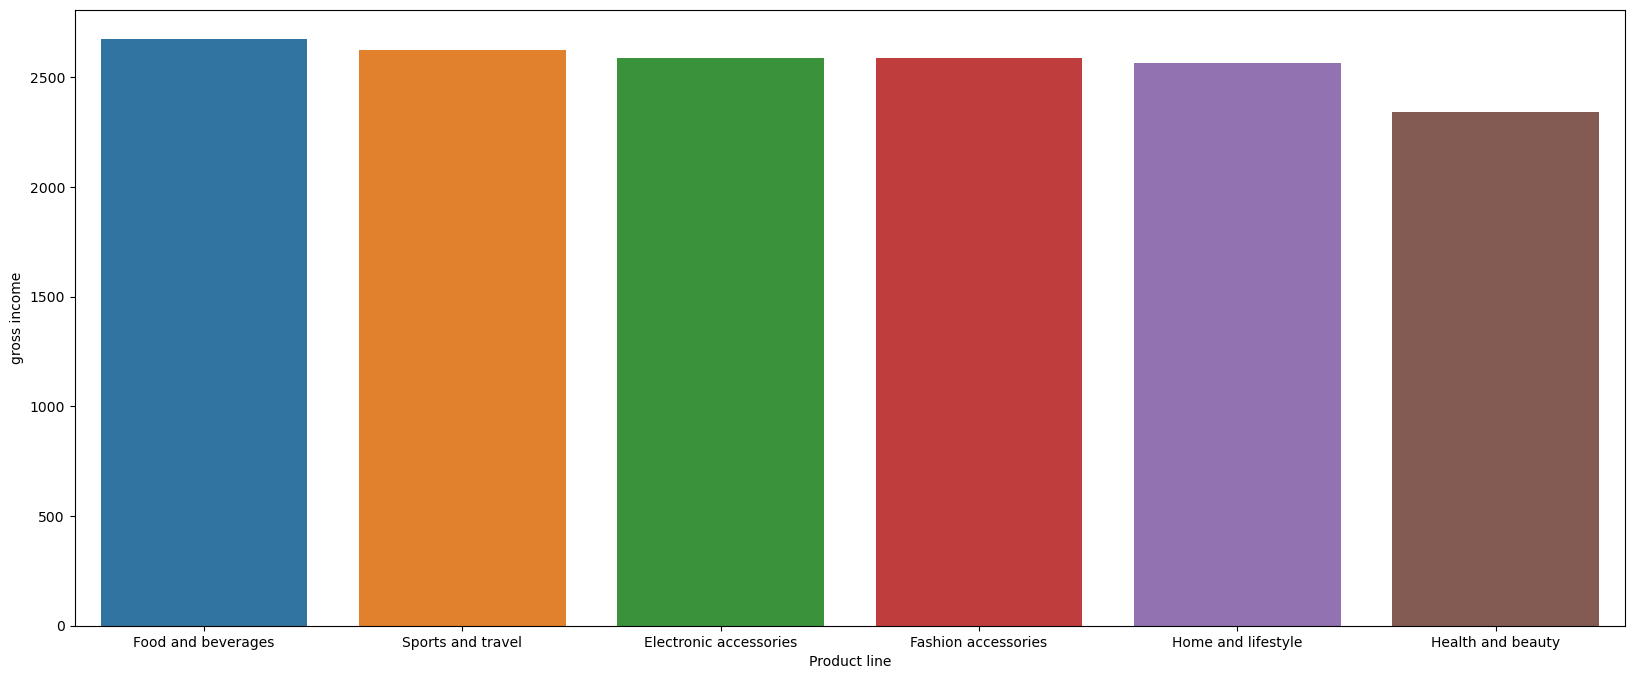

In [16]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat)

Gross income is more in Food and bevarages. However,**Health and supply need some good caring**

Text(0.5, 1.0, 'Product Sales per Hour')

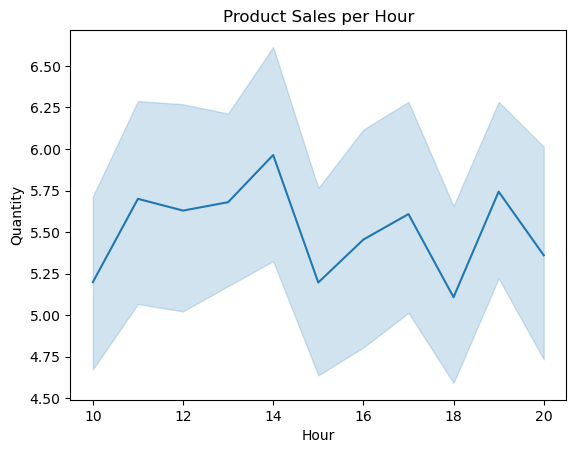

In [17]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

Peak was achieved during the **14th hour** of the day, So more quantity is been sold in **Afternoon**

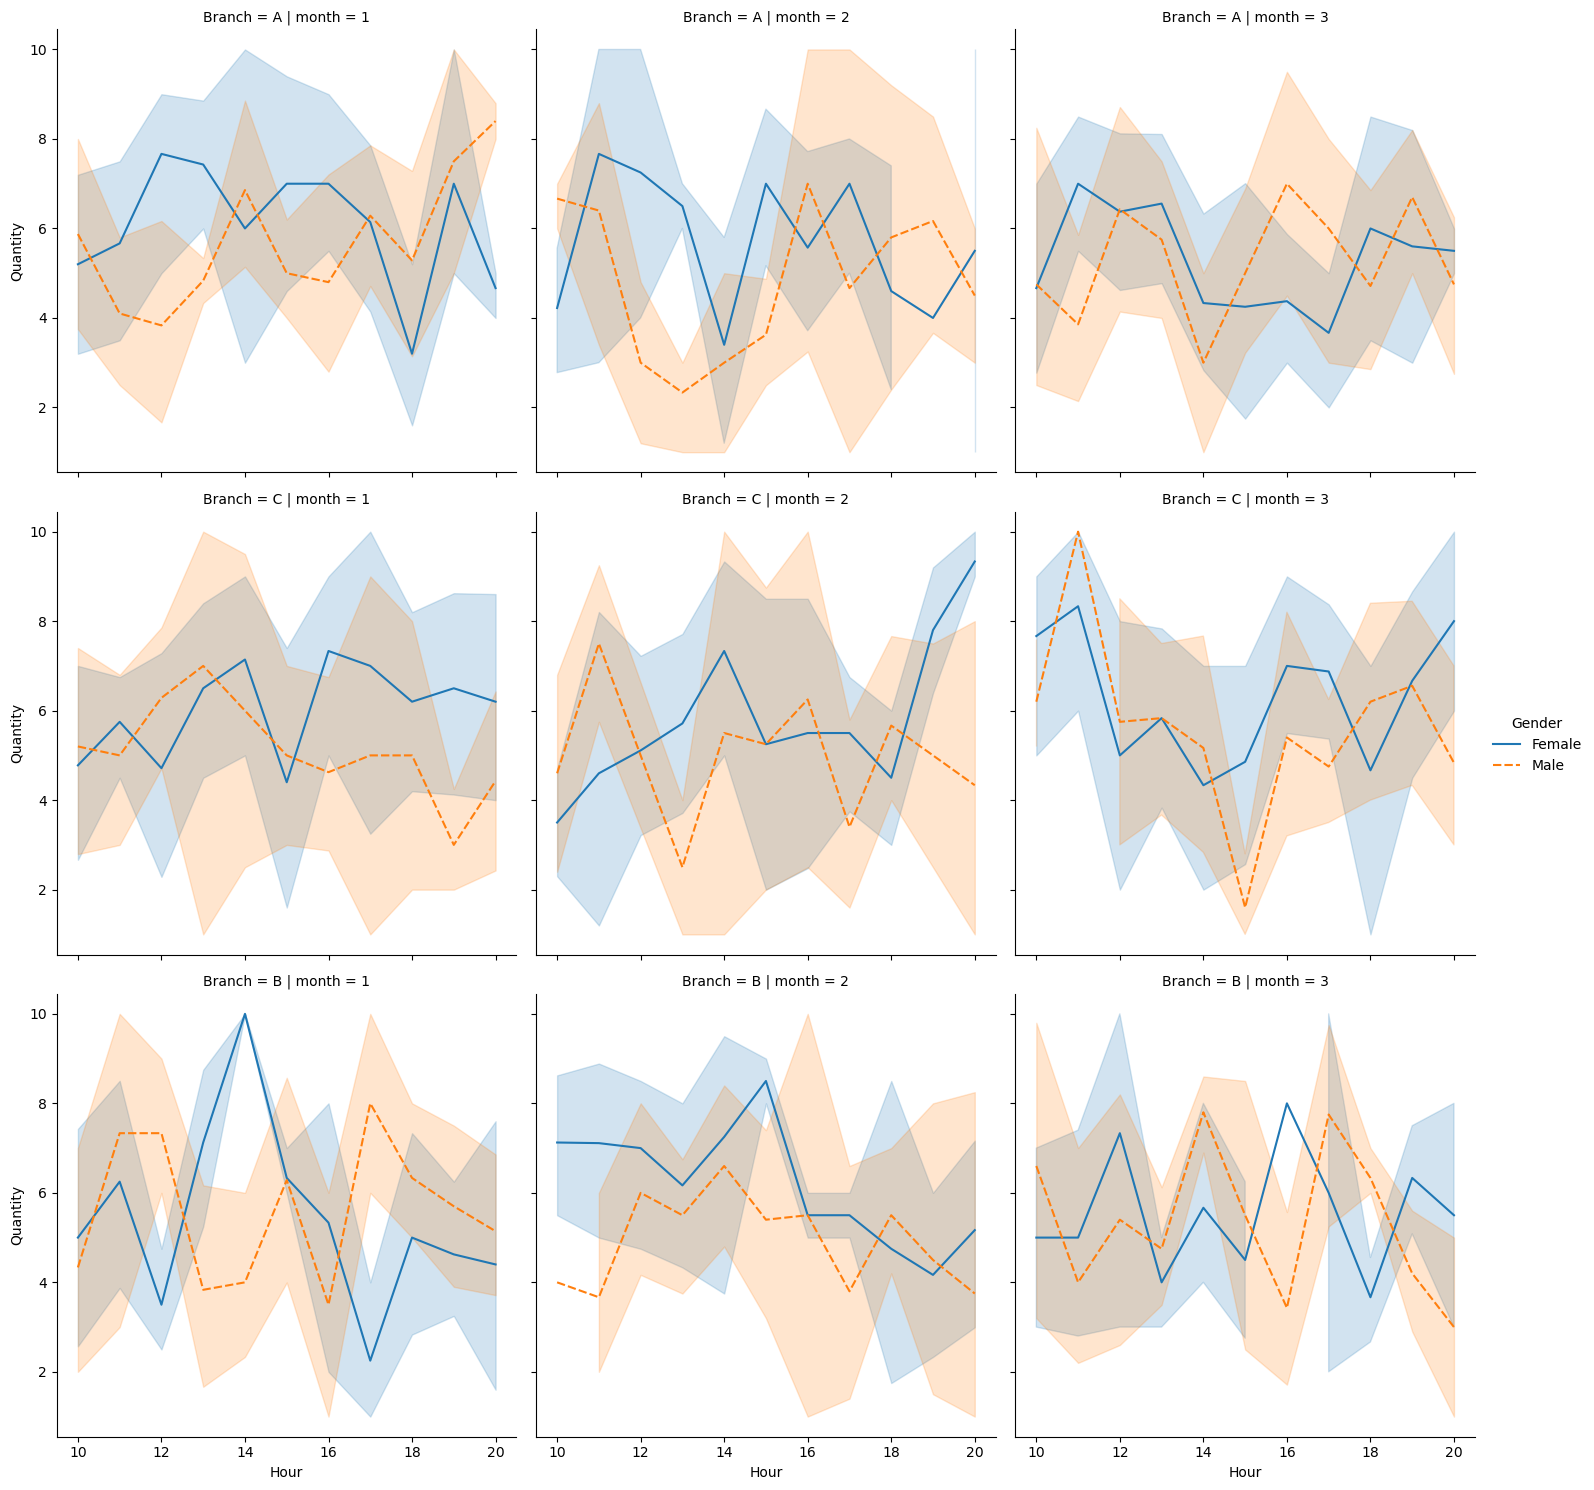

In [18]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)

A detailed plot of every **branch's Quantity** during the **three month** of time period presented by **females** and **males**

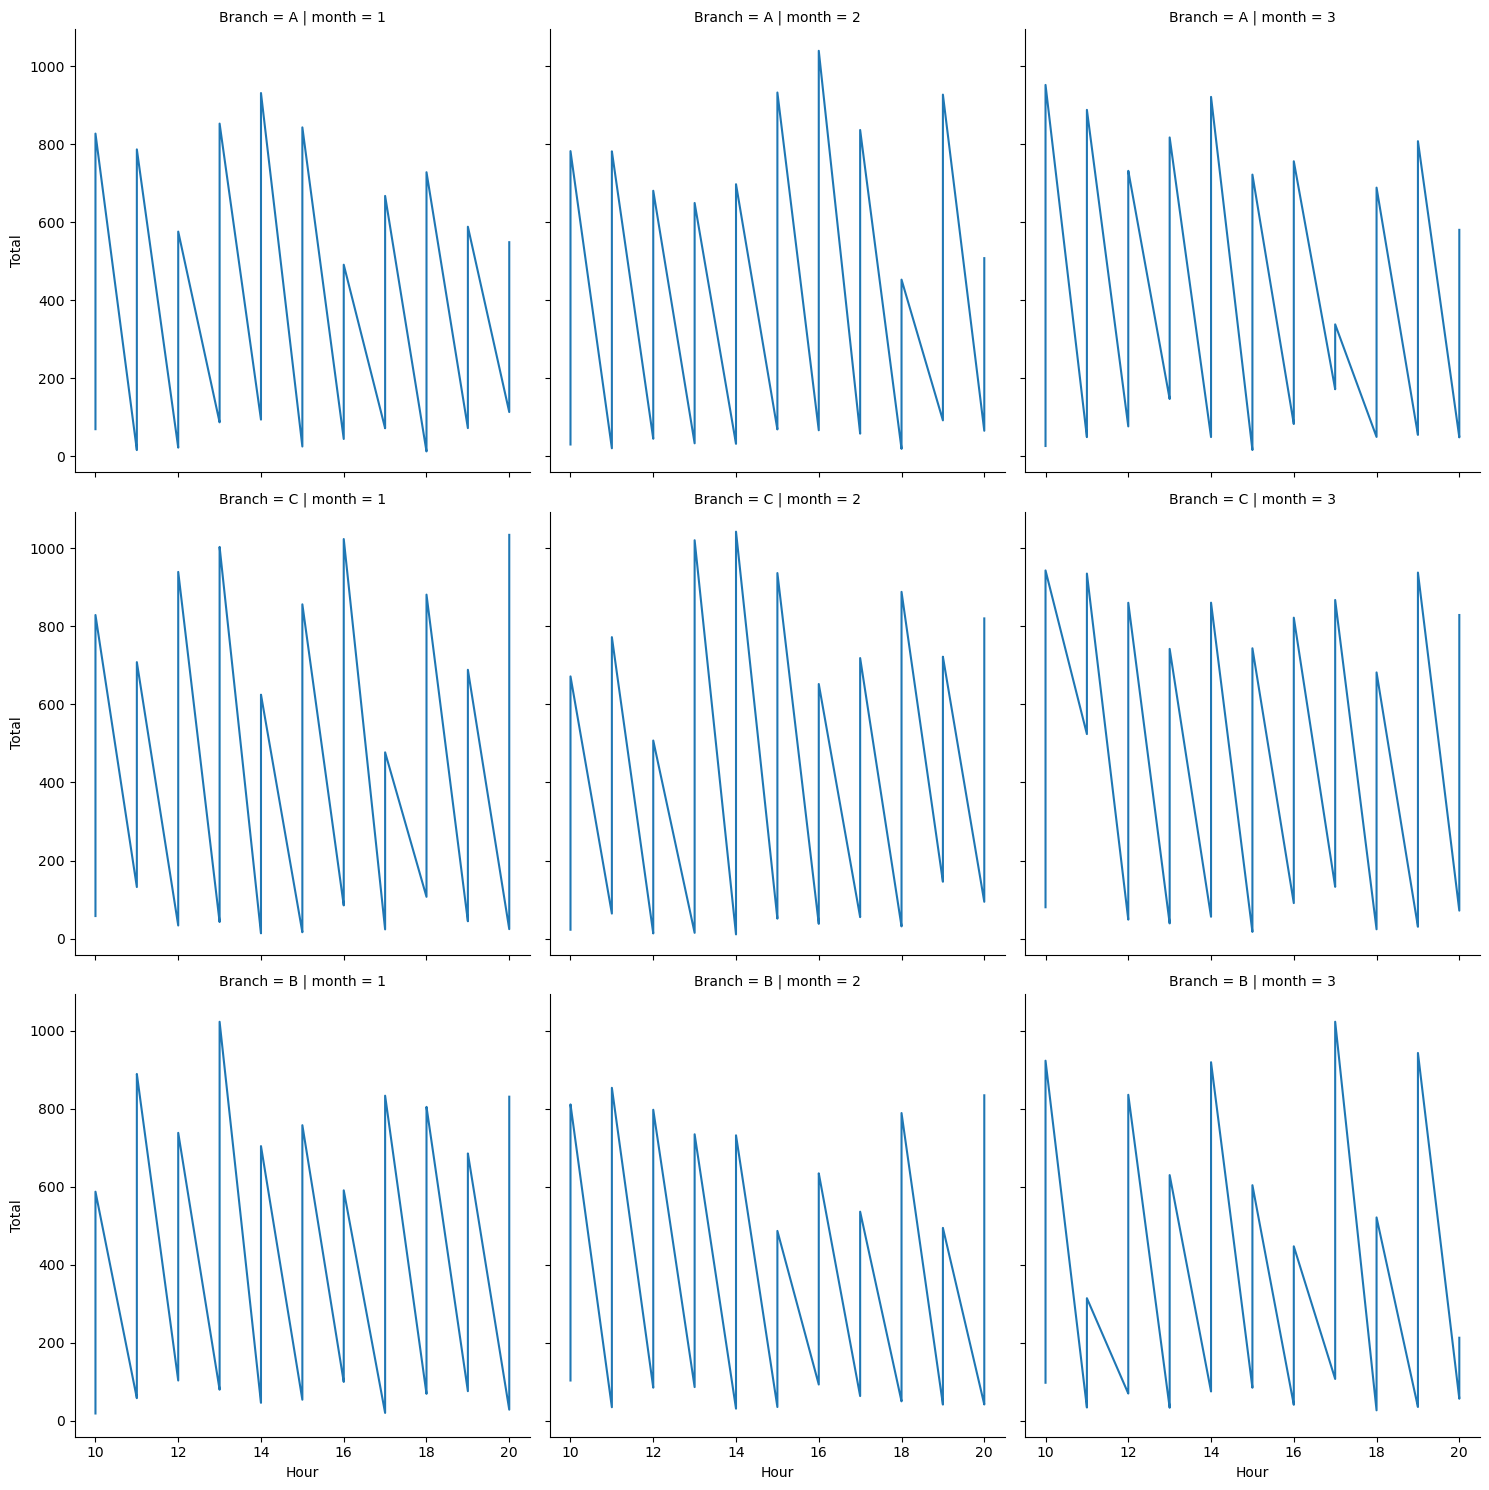

In [19]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)

Useless plot. **XD**

<Axes: xlabel='Quantity', ylabel='Product line'>

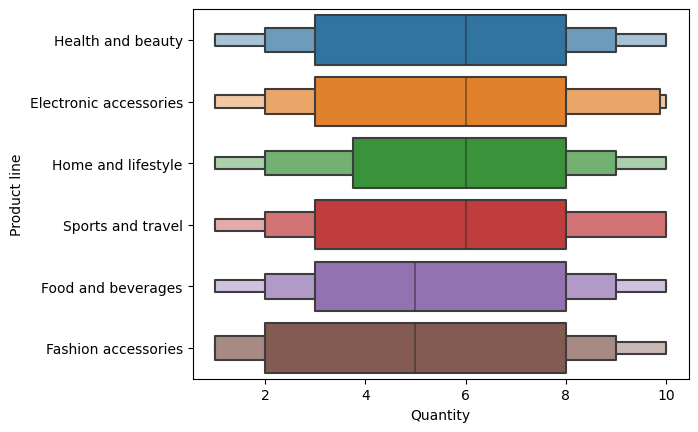

In [20]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

Here we can interpret that **food and bevarages**, **fashion accesories** has less **mean quantity** whereas we have seen that both of these categories had **high rating**. **So we need to increase our supply, matey.**

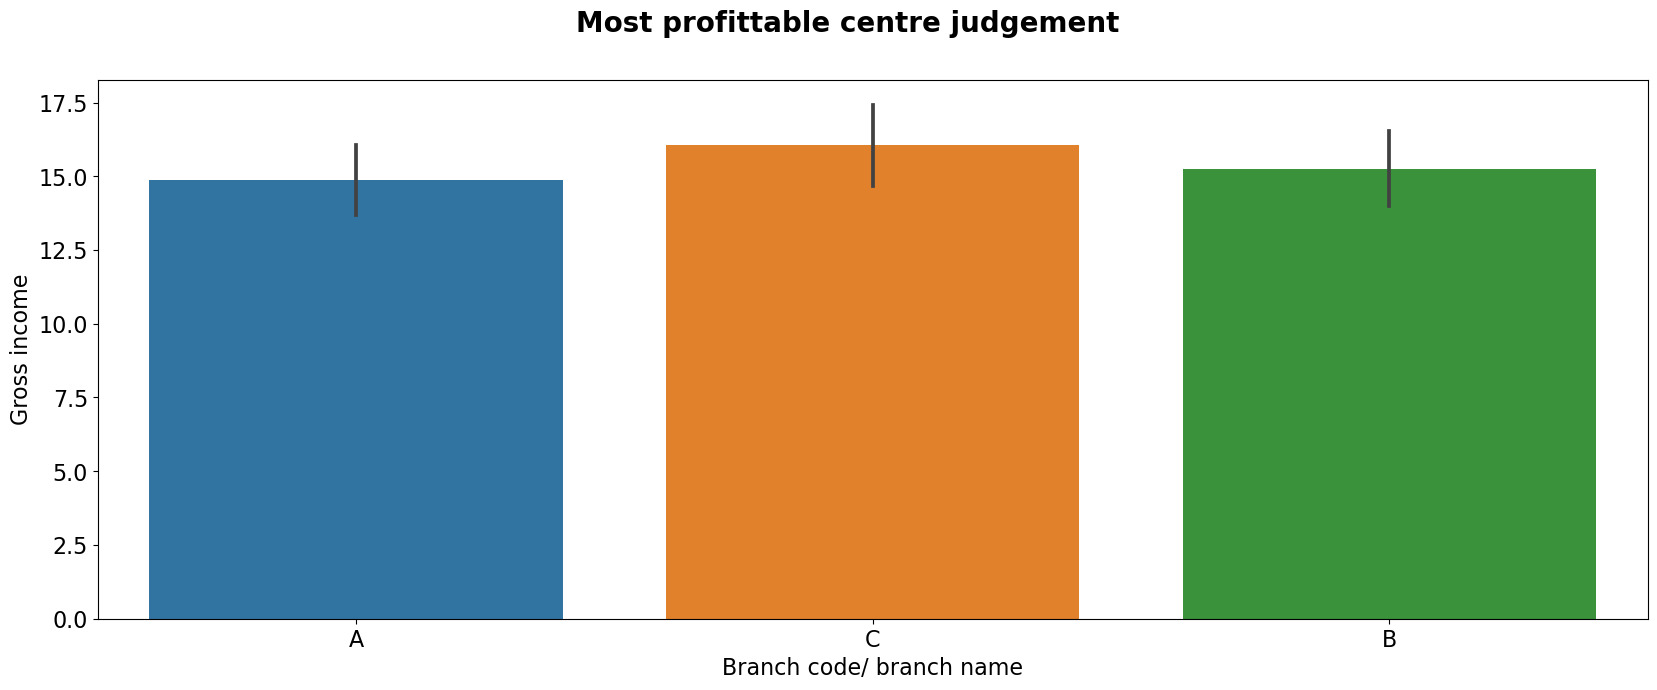

In [21]:
plt.figure(figsize=(20,7))
sns.barplot(x= df['Branch'],y =df['gross income'])
plt.xlabel('Branch code/ branch name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.suptitle("Most profittable centre judgement\n",fontsize='20',fontweight='bold');

Graph speak for itself.

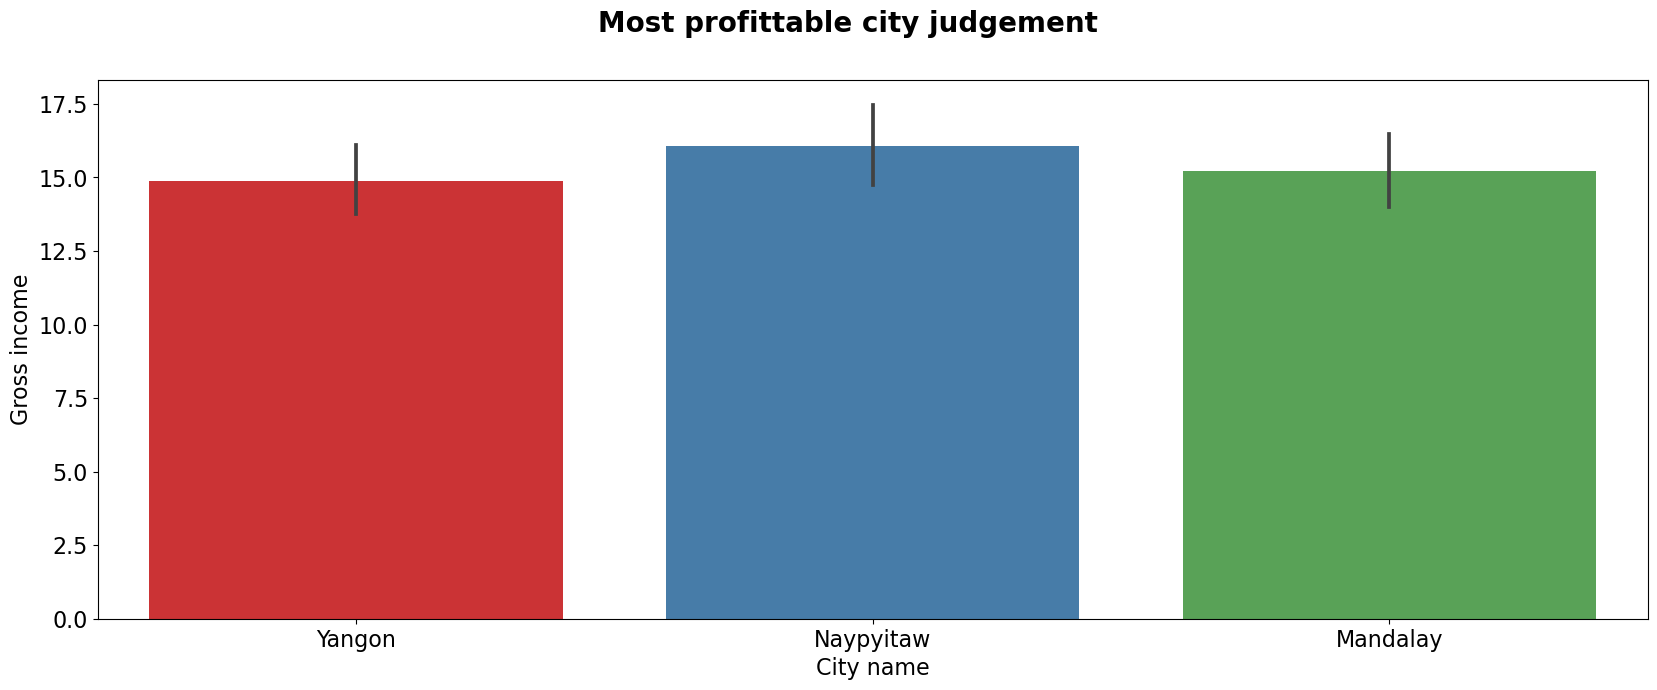

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(x = df['City'],y = df['gross income'],palette='Set1')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.suptitle("Most profittable city judgement\n",fontsize='20',fontweight='bold');

<Axes: xlabel='count', ylabel='Product line'>

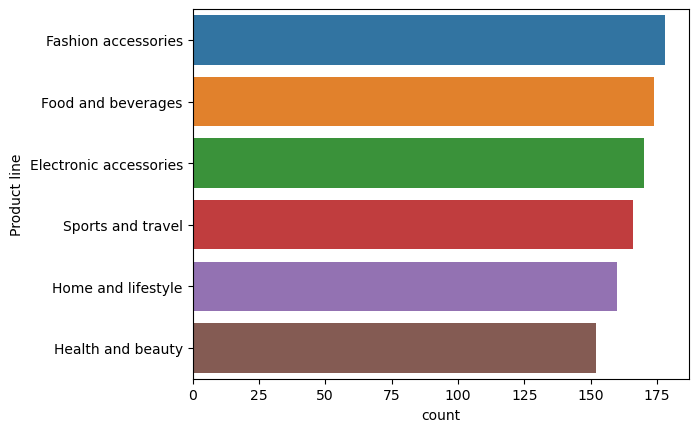

In [23]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

Fashion accessories and food and bevarages are highly scr***d we have to look into it.

<Axes: xlabel='Rating', ylabel='Product line'>

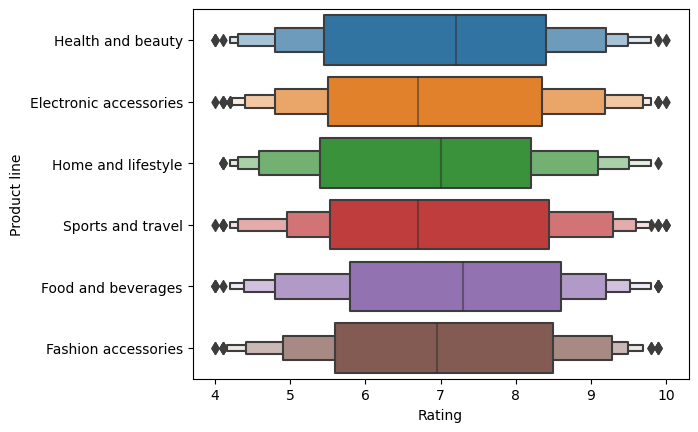

In [24]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=df )

Text(0.5, 1.0, 'Payment Mode')

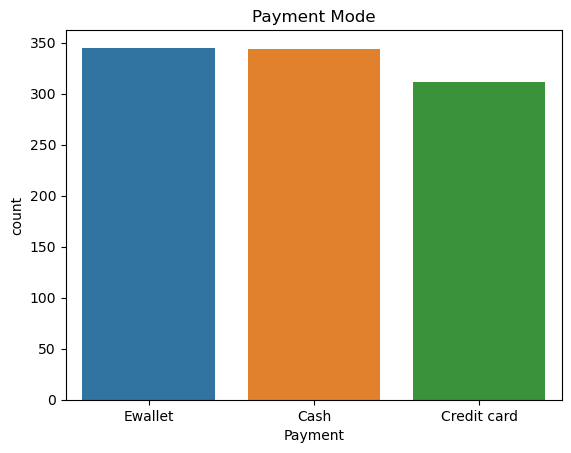

In [25]:
 sns.countplot(x="Payment", data =df).set_title("Payment Mode")

The Graph speak for itself

Text(0.5, 1.0, 'Payment Channel by Branch')

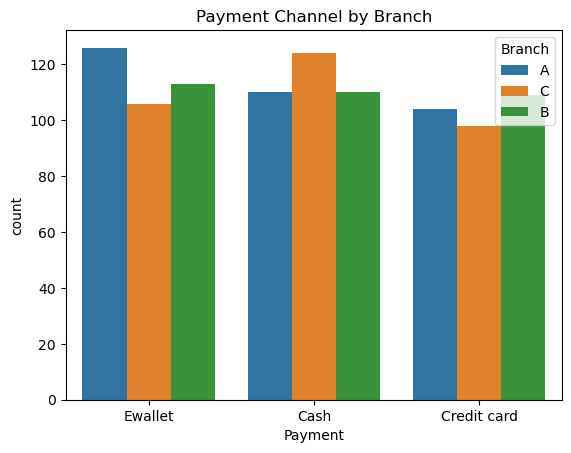

In [26]:
 sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch")

# Customer analysis

Text(0.5, 1.0, 'Customer Type by Branch')

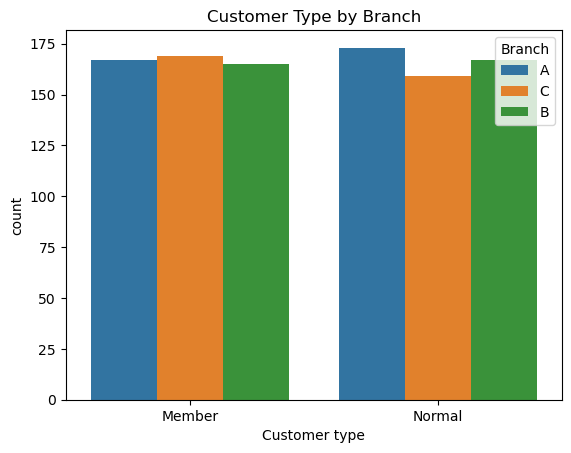

In [27]:
 sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch")

In [28]:
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Text(0.5, 1.0, 'Customer Type')

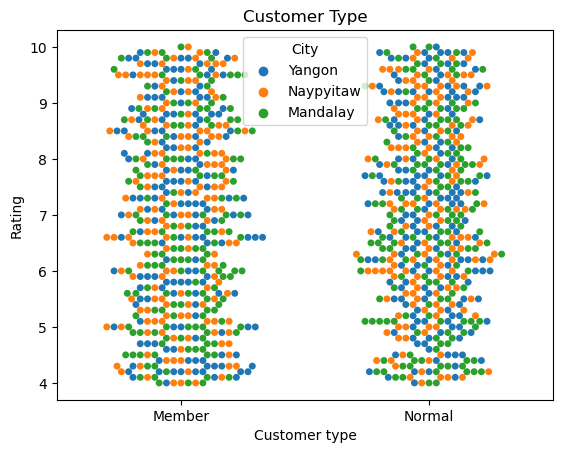

In [29]:
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =df).set_title("Customer Type") 


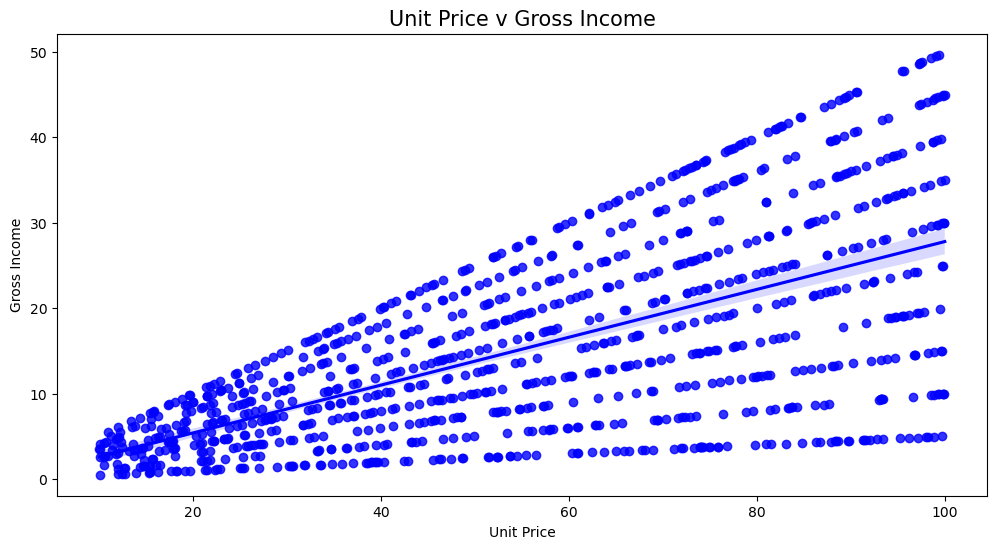

In [30]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

In [31]:
numerical = ['cogs','Quantity','gross income','Total']

array([[<Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Total'}>]], dtype=object)

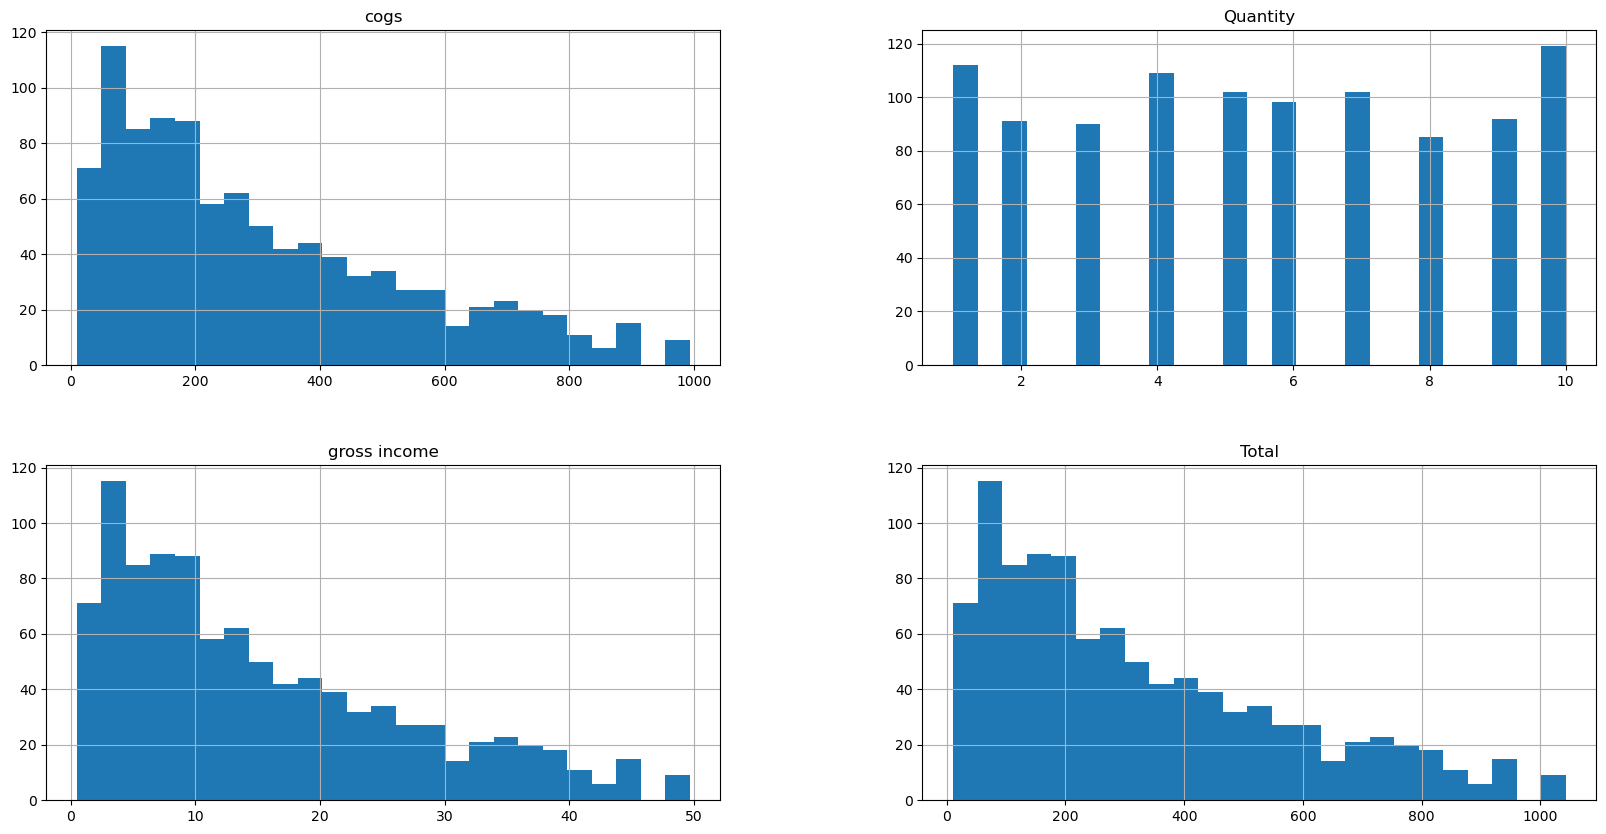

In [32]:
df[numerical].hist(bins=25, figsize=(20,10), layout=(2, 2))

<Axes: >

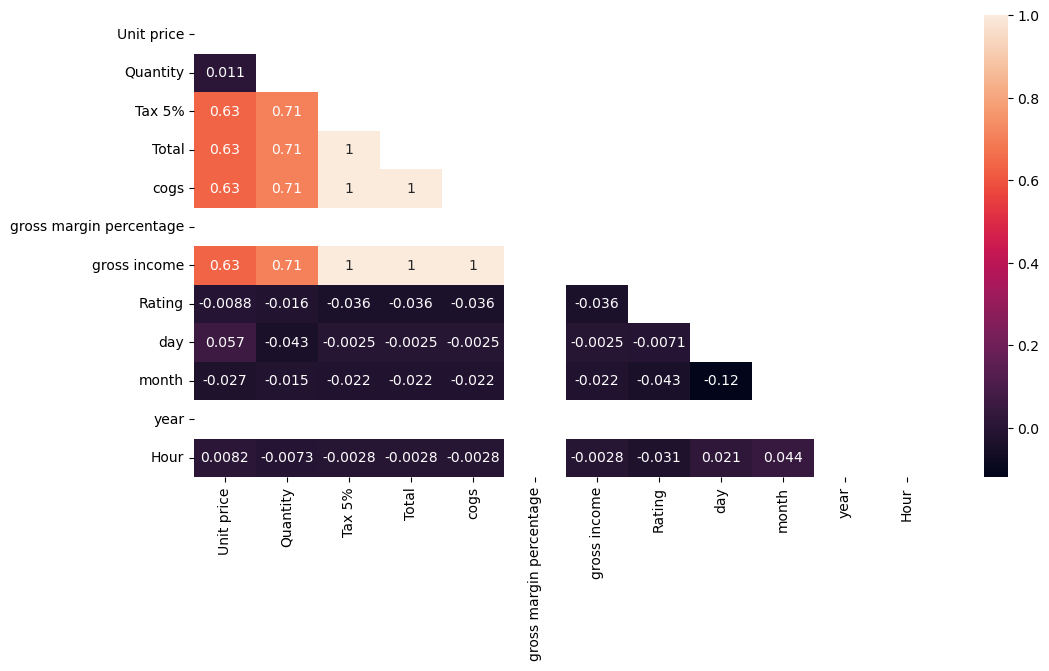

In [33]:
matrix = np.triu(df.corr())
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(df.corr(), annot=True, mask=matrix)

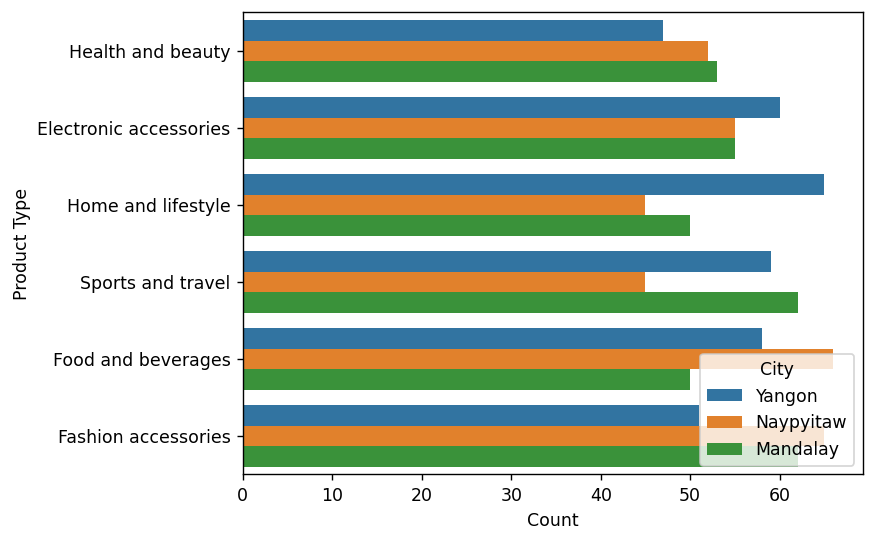

In [34]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show();

Well, Yangon leads at Home & Lifestyle and Electronic accessories.

Naypyitaw leads at Food & Bevaerages and Fashion accessories.

Mandalay leads at Sports & Travel and Health & Beauty.

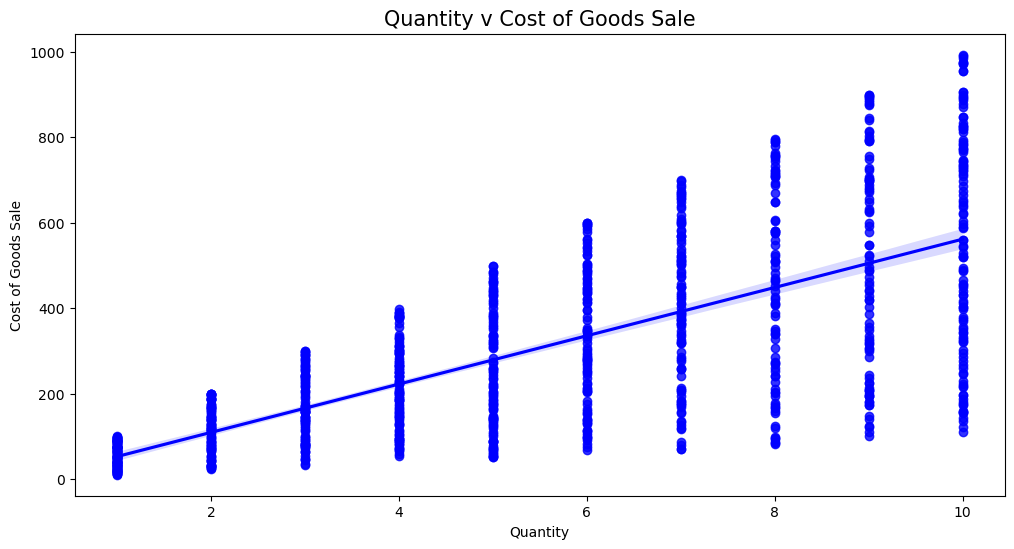

In [35]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='blue')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.iloc[:, -8].values.reshape(-1,1)

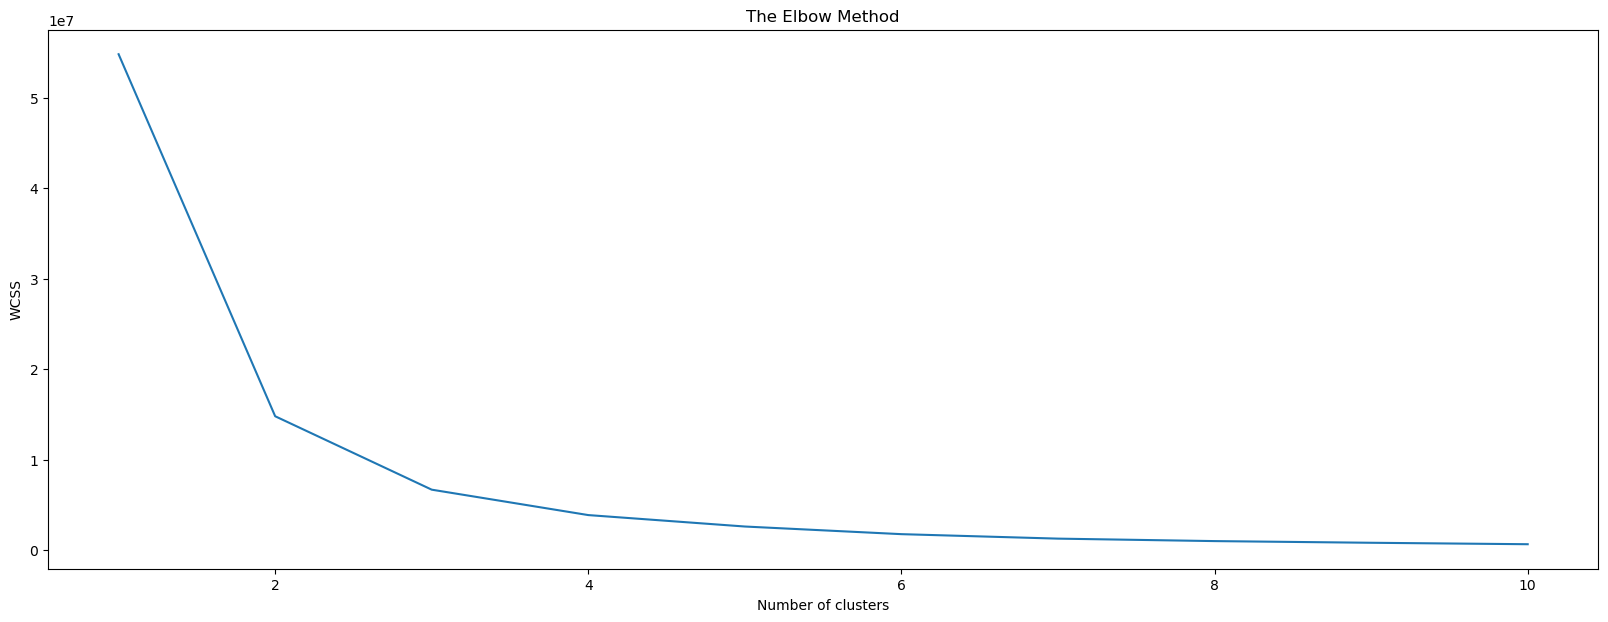

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

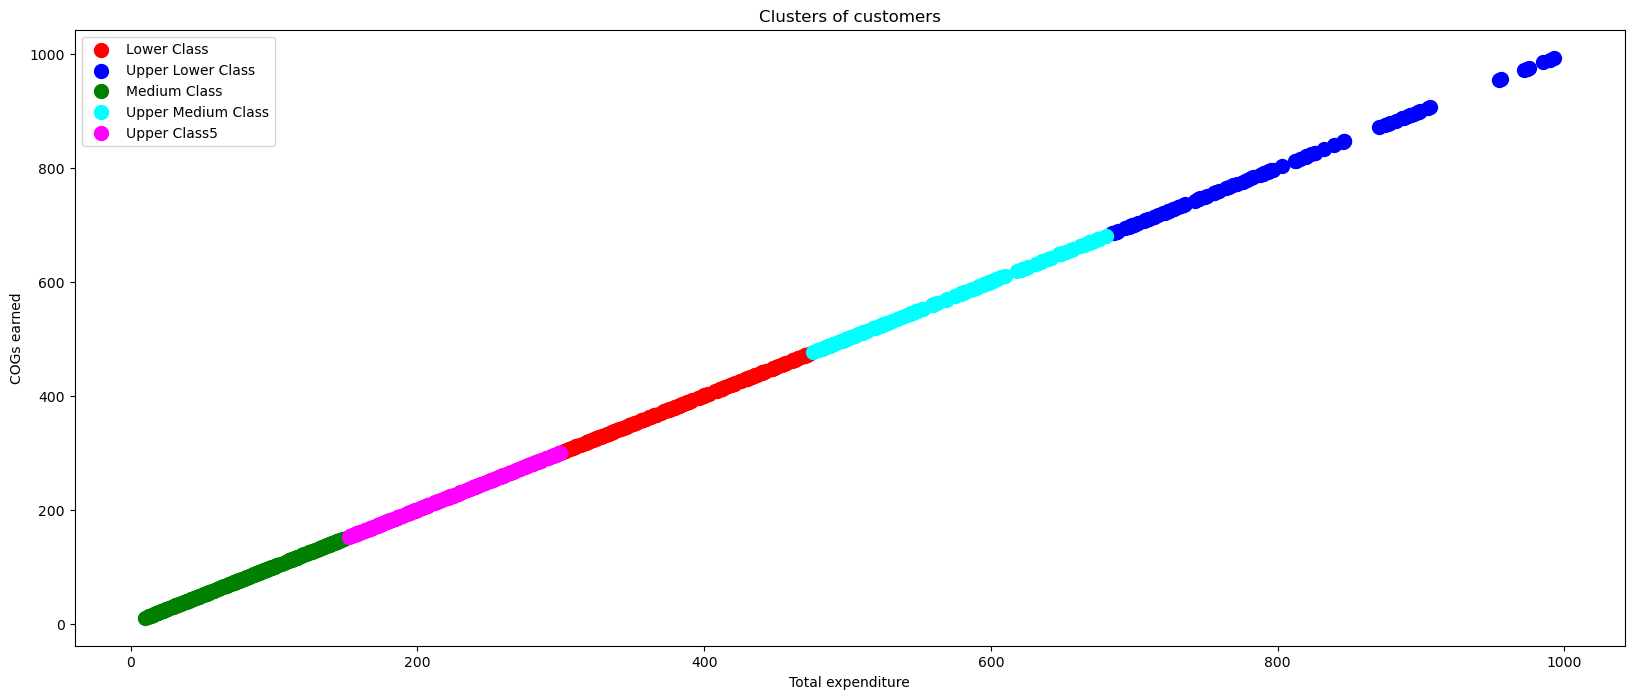

In [40]:
plt.figure(figsize=(20,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Lower Class')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Upper Lower Class')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2], s = 100, c = 'green', label = 'Medium Class')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3], s = 100, c = 'cyan', label = 'Upper Medium Class')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4], s = 100, c = 'magenta', label = 'Upper Class5')
plt.title('Clusters of customers')
plt.xlabel('Total expenditure')
plt.ylabel('COGs earned')
plt.legend()
plt.show()

Above, Precisely saying, red coloured cluster represents economically lower class of customers and blue cluster represents economically stronger group of customers


FINAL COMPLETE BUSINESS REPORT
1. The city chosen for expansion should be Naypyitaw.
2. Open the store in Naypyitaw with a full-backed inventory of goods in product categories - Food and Beverages, Fashion Assesories and Electronics.
3. The company should improve service in Electronics domain.
4. Increase service in cash payment modes.

# THE END